In [1]:
#importing libraries for Visualizing and finding insights of the data 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Reading the data
sonar_df=pd.read_csv('sonar.csv')

# Finding the insights from the dataset what it consist of

In [3]:
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,class
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [5]:
#finding the numbers of rows and columns present in the dataset
sonar_df.shape

(208, 61)

In [6]:
#finding the different values in column 'class'
sonar_df['class'].unique()

array(['R', 'M'], dtype=object)

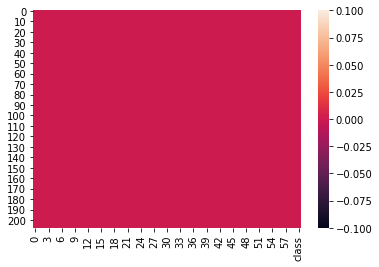

In [7]:
#checking wether the dataset consist of null or nan values
sns.heatmap(sonar_df.isnull())

In [8]:
sonar_df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
56       0
57       0
58       0
59       0
class    0
Length: 61, dtype: int64

In [9]:
#There donot exits any kind of null or nan values in the dataset

# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb.fit(sonar_df['class'])
lb.classes_

array(['M', 'R'], dtype=object)

In [11]:
sonar_df['class']=lb.fit_transform(sonar_df['class'])

In [12]:
sonar_df['class']

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: class, Length: 208, dtype: int32

# univariate analysis

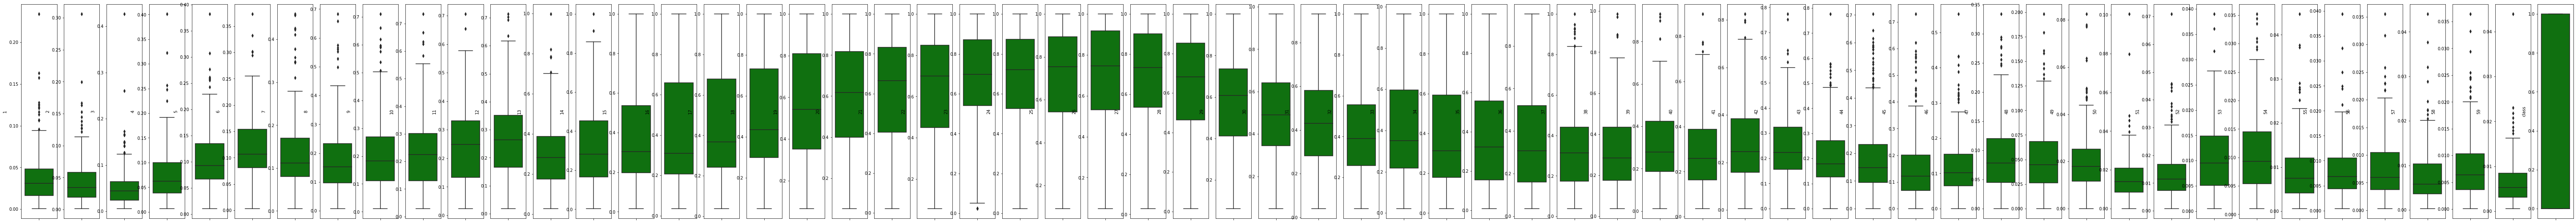

In [13]:
collist=sonar_df.columns.values
ncol=61
nrows=10
plt.figure(figsize=(110,110))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(sonar_df[collist[i]],color='green',orient='v')

There are outliers present in the sonar dataset

# Checking the Skewness

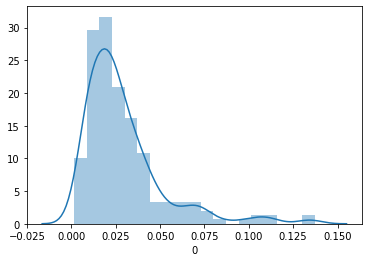

In [14]:
sns.distplot(sonar_df['0'])

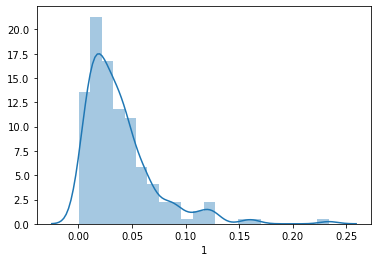

In [15]:
sns.distplot(sonar_df['1'])

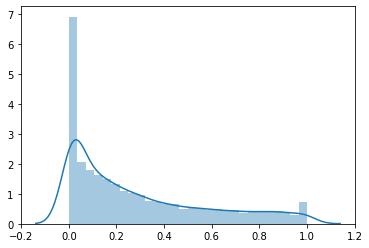

In [16]:
sns.distplot(sonar_df)

In [17]:
sonar_df.skew()

0        2.131088
1        2.155644
2        2.652518
3        3.401697
4        2.018141
           ...   
56       1.653090
57       2.098330
58       1.737506
59       2.775754
class    0.135903
Length: 61, dtype: float64

In [20]:
#removing the skewness
#removing skewness using np.sqrt
#treating skewed data
collist=sonar_df.columns.values
for i in range(0,len(collist)):
    if sonar_df.skew().loc[collist[i]]>0.55:
        sonar_df[collist[i]]=np.sqrt(sonar_df[collist[i]])


# Removing Outliers and skewness from the dataset

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(sonar_df))
z

array([[0.32224933, 0.15531053, 0.16769607, ..., 0.36564431, 0.71420695,
        1.06973356],
       [0.89343374, 0.63210915, 1.21055244, ..., 0.34235827, 0.35459974,
        1.06973356],
       [0.0257362 , 0.7980294 , 1.72492804, ..., 0.4465209 , 0.45511376,
        1.06973356],
       ...,
       [1.15958304, 0.37246809, 0.74089729, ..., 0.14417485, 0.74701882,
        0.93481221],
       [0.23349154, 0.09279177, 0.3485941 , ..., 0.71914443, 0.24596807,
        0.93481221],
       [0.01519957, 0.12771606, 0.96011963, ..., 0.15595758, 1.15195528,
        0.93481221]])

In [22]:
#checking the skewness before removing the outliers
sonar_df.skew()

0        1.014296
1        0.757933
2        0.909984
3        1.136996
4        0.691256
           ...   
56       0.681551
57       0.803090
58       0.616000
59       0.986014
class    0.135903
Length: 61, dtype: float64

There is still skewness presnet in the dataset

In [23]:
#removing the outliers

In [24]:
threshold=3

In [46]:
#printing all the values which are greater than the threshold value
print(np.where(z>3))

(array([  2,  22,  22,  38,  44,  91,  91,  95,  95,  95,  97,  97,  98,
        98,  98,  98,  98, 101, 111, 111, 111, 127, 127, 129, 131, 135,
       135, 136, 140, 140, 142, 142, 146, 146, 146, 146, 147, 147, 147,
       147, 147], dtype=int64), array([56, 48, 49,  6, 43,  5,  6, 42, 43, 49, 58, 59,  0,  1,  2,  3,  4,
       57,  2,  3,  4, 13, 54,  0,  0,  8, 55,  8, 49, 50, 54, 58, 45, 46,
       50, 51, 49, 54, 55, 56, 57], dtype=int64))


In [47]:
z[2][56]#checking wether the result is correct or not

3.136038685237249

In [48]:
sonar_new=sonar_df[(z<3).all(axis=1)] #removing outliers

In [49]:
sonar_new.shape

(189, 61)

In [50]:
#after removing the outliers we are left with 189 rows

In [51]:
sonar_df.shape

(208, 61)

# Splitting The data into training and testing sets

In [52]:
x=sonar_new.iloc[:,:-1]

In [53]:
x.shape

(189, 60)

In [54]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.141421,0.192614,0.206882,0.143875,0.308869,0.314006,0.392301,0.400125,0.557584,0.459456,...,0.152315,0.051962,0.080623,0.126095,0.084853,0.129228,0.134164,0.091652,0.094868,0.056569
1,0.212838,0.228692,0.290345,0.262488,0.343948,0.508232,0.464327,0.590000,0.577668,0.535910,...,0.111803,0.091652,0.094340,0.069282,0.096954,0.138203,0.118322,0.070000,0.072111,0.066332
3,0.100000,0.130767,0.249600,0.143178,0.143178,0.191833,0.331361,0.357211,0.244540,0.355528,...,0.155242,0.110000,0.060000,0.122474,0.092195,0.085440,0.070711,0.066332,0.063246,0.108167
4,0.276043,0.258070,0.219317,0.198494,0.242899,0.254755,0.347707,0.496689,0.596992,0.667757,...,0.124900,0.055678,0.073485,0.102470,0.104881,0.038730,0.084853,0.069282,0.103441,0.096954
5,0.169115,0.212838,0.166433,0.131909,0.195959,0.314643,0.346554,0.428135,0.458803,0.551271,...,0.101980,0.067082,0.037417,0.061644,0.036056,0.094340,0.075498,0.051962,0.071414,0.078740


In [55]:
y=sonar_new.iloc[:,-1]

In [56]:
y.shape

(189,)

In [57]:
y.head()

0    1
1    1
3    1
4    1
5    1
Name: class, dtype: int32

In [58]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)


In [59]:
x=df_x
print(x)

[[-0.2534842   0.27795347  0.31148697 ...  0.461652    0.55485988
  -0.67848575]
 [ 1.12788203  0.80051971  1.47640309 ... -0.29791092 -0.23395712
  -0.26595637]
 [-1.05467123 -0.6178464   0.90771477 ... -0.42657167 -0.54125342
   1.50154201]
 ...
 [ 1.43030431  0.51595585 -0.7034515  ...  1.36751697  0.30811095
  -0.71612644]
 [ 0.37799755  0.20943357  0.51355797 ...  0.36449194 -0.65375126
  -0.14133774]
 [ 0.12995498  0.24771023 -0.94833243 ... -0.64872376 -0.02627987
   1.46231328]]


In [77]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc



In [78]:
#Finding the best random_state

In [79]:
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=75,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    predlg=lg.predict(x_test)
    acc_score=accuracy_score(y_test,predlg)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 

Accuracy SCORE is equal to : 0.7866666666666666 at random state 42
Accuracy SCORE is equal to : 0.8 at random state 43
Accuracy SCORE is equal to : 0.6933333333333334 at random state 44
Accuracy SCORE is equal to : 0.7866666666666666 at random state 45
Accuracy SCORE is equal to : 0.7733333333333333 at random state 46
Accuracy SCORE is equal to : 0.7066666666666667 at random state 47
Accuracy SCORE is equal to : 0.8133333333333334 at random state 48
Accuracy SCORE is equal to : 0.7733333333333333 at random state 49
Accuracy SCORE is equal to : 0.7333333333333333 at random state 50
Accuracy SCORE is equal to : 0.7466666666666667 at random state 51
Accuracy SCORE is equal to : 0.7466666666666667 at random state 52
Accuracy SCORE is equal to : 0.76 at random state 53
Accuracy SCORE is equal to : 0.7866666666666666 at random state 54
Accuracy SCORE is equal to : 0.8133333333333334 at random state 55
Accuracy SCORE is equal to : 0.7333333333333333 at random state 56
Accuracy SCORE is equal 

In [80]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=75,random_state=62)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(114, 60) (75, 60) (114,) (75,)


In [81]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'penalty': 'l2'}

In [82]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'C': 10, 'kernel': 'rbf'}

In [83]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 1}

In [84]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.8533333333333334


CROSS_VAL_SCORE = 0.6883040935672514


ROC_AUC_SCORE = 0.8535714285714286


 
 Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.87      0.85      0.86        40

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



[[30  5]
 [ 6 34]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_featur

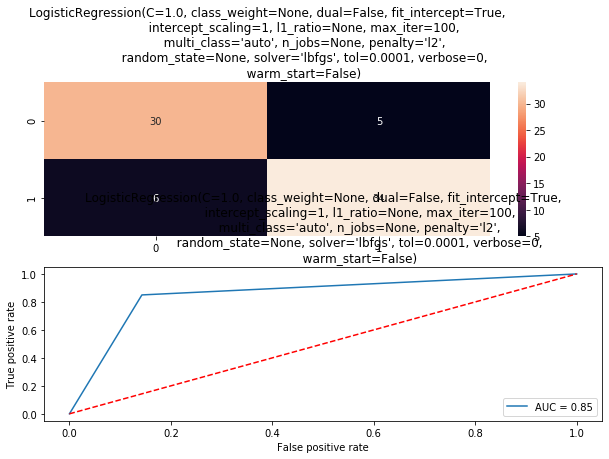

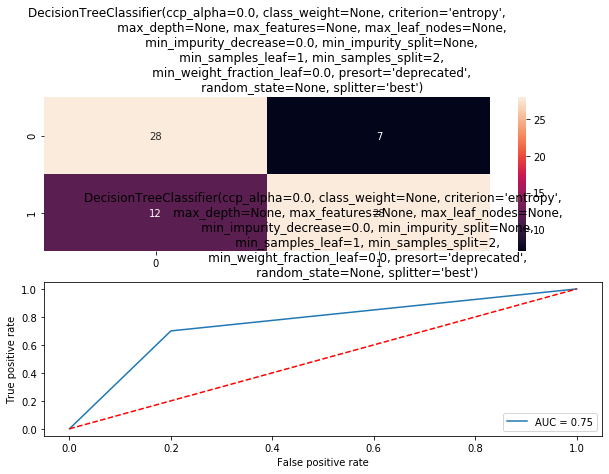

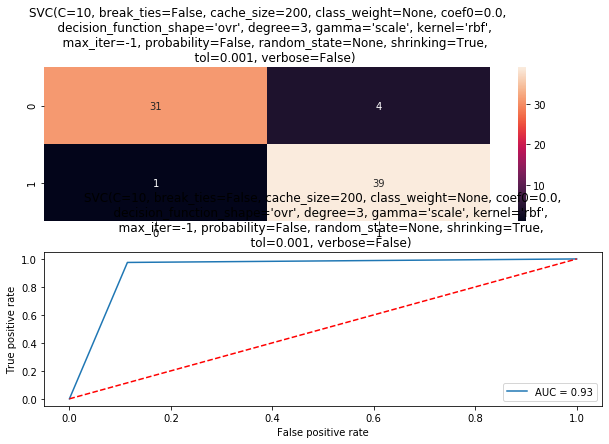

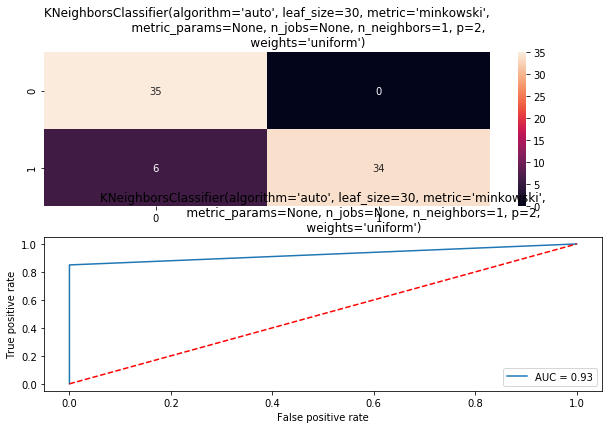

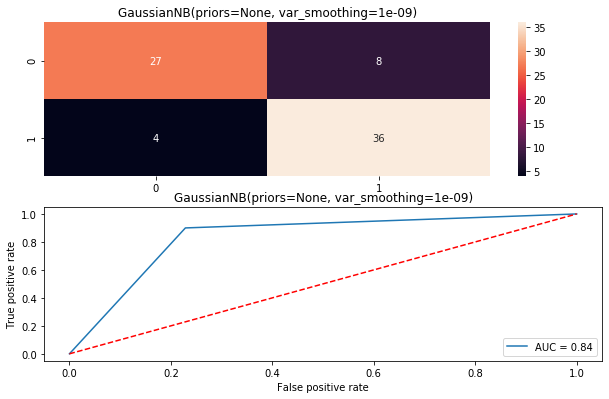

In [85]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),SVC(C=10,kernel='rbf'),KNeighborsClassifier(n_neighbors=1),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [86]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB'],'Accuracy_Score':[0.8533333333333334,0.7466666666666667,0.9333333333333333,0.92,0.84],'Cross_Val_Sore':[  0.6883040935672514,0.6625730994152047,0.7520467836257309, 0.7195906432748538,0.6760233918128655],'Roc_Auc_Score':[0.8535714285714286,0.75,0.9303571428571429,0.925,0.8357142857142857]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore,Roc_Auc_Score
0,LogisticRegression,0.853333,0.688304,0.853571
1,DecisionTreeClassifier,0.746667,0.662573,0.750000
2,SVC,0.933333,0.752047,0.930357
3,KNeighborsClassifier,0.920000,0.719591,0.925000
4,GaussianNB,0.840000,0.676023,0.835714


In [87]:
#Hence it is observed that svc is giving a good result, therefore finalizing it

In [89]:
svc=SVC(C=10, kernel='rbf')
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(svc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.9333333333333333
The Cross Val Score = 0.7520467836257309


In [90]:
from sklearn.externals import joblib
joblib.dump(svc,"svc_Sonar_rock_n_mine.pkl")

['svc_Sonar_rock_n_mine.pkl']